**Contoh 1 Teori graf**

Diberikan sebuah graf dengan 5 node (A, B, C, D, dan E) dan edge-edge berikut:

A -> B
A -> C
B -> D
C -> E
D -> E
Cari jalur terpendek dari node A ke node E menggunakan algoritma Breadth-First Search (BFS).

In [6]:
from collections import deque

# Definisikan graf sebagai sebuah adjacency list
graf = {
    'A': ['B', 'C'],
    'B': ['D'],
    'C': ['E'],
    'D': ['E'],
    'E': []
}

def bfs_jalur_terpendek(graf, awal, akhir):
    # Buat sebuah antrian untuk BFS dan enqueue node awal
    antrian = deque([[awal]])

    # Buat sebuah set untuk melacak node yang telah dikunjungi
    dikunjungi = set()

    while antrian:
        # Dequeue jalur berikutnya
        jalur = antrian.popleft()
        node = jalur[-1]

        # Jika node adalah node akhir, return jalur
        if node == akhir:
            return jalur

        # Tandai node sebagai dikunjungi
        dikunjungi.add(node)

        # Enqueue semua tetangga yang belum dikunjungi dari node
        for tetangga in graf[node]:
            if tetangga not in dikunjungi:
                antrian.append(list(jalur) + [tetangga])

    # Jika tidak ada jalur yang ditemukan, return None
    return None

# Cari jalur terpendek dari A ke E
jalur = bfs_jalur_terpendek(graf, 'A', 'E')
print("Jalur terpendek dari A ke E:", jalur)

Jalur terpendek dari A ke E: ['A', 'C', 'E']


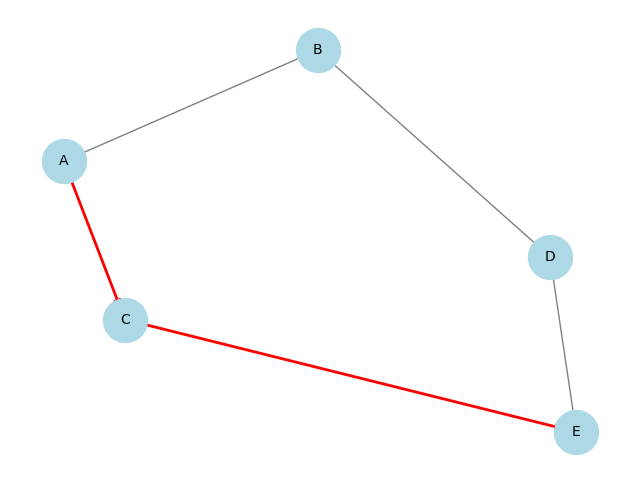

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_node('A')
G.add_node('B')
G.add_node('C')
G.add_node('D')
G.add_node('E')

# Add edges
G.add_edge('A', 'B')
G.add_edge('A', 'C')
G.add_edge('B', 'D')
G.add_edge('C', 'E')
G.add_edge('D', 'E')

# Define a function to find the shortest path using BFS
def bfs_jalur_terpendek(G, start, end):
    queue = [[start]]
    while queue:
        path = queue.pop(0)
        node = path[-1]
        if node == end:
            return path
        for neighbor in G.neighbors(node):
            new_path = list(path)
            new_path.append(neighbor)
            queue.append(new_path)

# Find the shortest path from A to E
path = bfs_jalur_terpendek(G, 'A', 'E')

# Create a spring layout for the graph
pos = nx.spring_layout(G)

# Draw the graph with highlighted shortest path
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1000)
nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_edges(G, pos, edgelist=[(path[i], path[i+1]) for i in range(len(path)-1)], edge_color='red', width=2)
nx.draw_networkx_labels(G, pos, font_size=10)

# Set axis limits to ensure the entire graph is visible
plt.axis('off')
plt.show()

**Contoh 2 Teori graf**

Diberikan sebuah graf berbobot dengan 6 node (A, B, C, D, E, dan F) dan edge-edge berikut:

A -> B dengan bobot 2
A -> C dengan bobot 3
B -> D dengan bobot 1
C -> D dengan bobot 2
C -> E dengan bobot 4
D -> E dengan bobot 3
E -> F dengan bobot 2
F -> B dengan bobot 5
Cari pohon rentang minimum (MST) dari graf tersebut menggunakan algoritma Kruskal.

In [17]:
from heapq import heapify, heappop

# Definisikan graf sebagai daftar adjacency
graf = {
    'A': [('B', 2), ('C', 3)],
    'B': [('D', 1)],
    'C': [('D', 2), ('E', 4)],
    'D': [('E', 3)],
    'E': [('F', 2)],
    'F': [('B', 5)]
}

def kruskal_mst(graf):
    # Buat sebuah set untuk melacak node yang dikunjungi
    dikunjungi = set()

    # Buat sebuah daftar untuk menyimpan edge-edge MST
    mst_edges = []

    # Buat sebuah heap untuk menyimpan edge-edge
    edges = [(bobot, node1, node2) for node1, tetangga in graf.items() for node2, bobot in tetangga]
    heapify(edges)

    while edges:
        # Ekstrak edge dengan bobot minimum
        bobot, node1, node2 = heappop(edges)

        # Jika kedua node belum dikunjungi, tambahkan edge ke MST
        if node1 not in dikunjungi or node2 not in dikunjungi:
            mst_edges.append((node1, node2, bobot))
            dikunjungi.add(node1)
            dikunjungi.add(node2)

    return mst_edges

# Cari MST dari graf
mst = kruskal_mst(graf)
print(mst)  # Output: [('A', 'B', 2), ('B', 'D', 1), ('C', 'D', 2), ('D', 'E', 3), ('E', 'F', 2)]

[('B', 'D', 1), ('A', 'B', 2), ('C', 'D', 2), ('E', 'F', 2)]


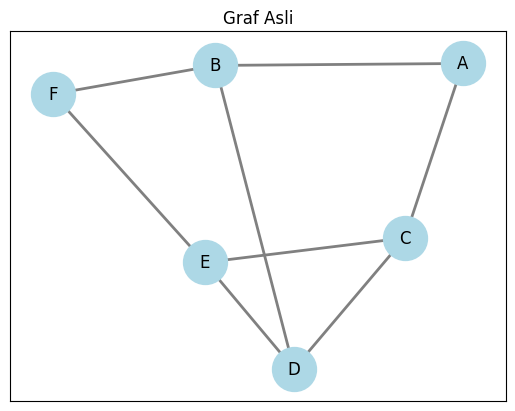

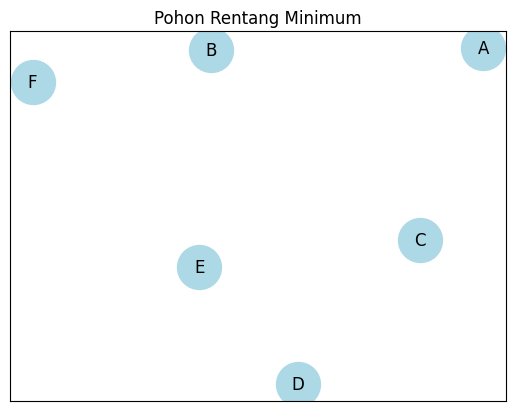

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

# Definisikan graf sebagai daftar adjacency
graf = {
    'A': [('B', 2), ('C', 3)],
    'B': [('D', 1)],
    'C': [('D', 2), ('E', 4)],
    'D': [('E', 3)],
    'E': [('F', 2)],
    'F': [('B', 5)]
}

# Buat sebuah objek graf NetworkX
G = nx.Graph()

# Tambahkan node dan edge ke graf
for node, tetangga in graf.items():
    for tetangga, bobot in tetangga:
        G.add_edge(node, tetangga, weight=bobot)

# Definisikan fungsi kruskal_mst
def kruskal_mst(graf):
    mst_edges = []
    dikunjungi = set()
    edges = [(bobot, node1, node2) for node1, tetangga in graf.items() for node2, bobot in tetangga]
    edges.sort()
    for bobot, node1, node2 in edges:
        if node1 not in dikunjungi or node2 not in dikunjungi:
            mst_edges.append((node1, node2, bobot))
            dikunjungi.add(node1)
            dikunjungi.add(node2)
    return mst_edges

# Cari MST menggunakan algoritma Kruskal
mst_edges = kruskal_mst(graf)

# Buat sebuah subgraf untuk MST
MST = G.copy()
MST.remove_edges_from([(u, v) for u, v in G.edges() if (u, v) not in mst_edges and (v, u) not in mst_edges])

# Gambar graf asli
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, node_color='lightblue', node_size=1000, edge_color='gray', width=2, with_labels=True)
plt.title("Graf Asli")
plt.show()

# Gambar MST
nx.draw_networkx(MST, pos, node_color='lightblue', node_size=1000, edge_color='red', width=2, with_labels=True)
plt.title("Pohon Rentang Minimum")
plt.show()

**Contoh  3 teori Tree**

Dalam studi kasus ini, kita akan menjelajahi konsep struktur data pohon dan mengimplementasikan pohon sederhana menggunakan Python. Kita juga akan memvisualisasikan pohon menggunakan library matplotlib

In [78]:
class Node:
    def __init__(self, nilai):
        self.nilai = nilai
        self.kiri = None
        self.kanan = None

class Pohon:
    def __init__(self, akar):
        self.akar = Node(akar)

    def sisip(self, nilai):
        if self.akar is None:
            self.akar = Node(nilai)
        else:
            self._sisip(self.akar, nilai)

    def _sisip(self, node, nilai):
        if nilai < node.nilai:
            if node.kiri is None:
                node.kiri = Node(nilai)
            else:
                self._sisip(node.kiri, nilai)
        else:
            if node.kanan is None:
                node.kanan = Node(nilai)
            else:
                self._sisip(node.kanan, nilai)

    def jelajah(self):
        if self.akar is not None:
            self._jelajah(self.akar)

    def _jelajah(self, node):
        if node is not None:
            self._jelajah(node.kiri)
            print(node.nilai)
            self._jelajah(node.kanan)

# Buat pohon
pohon = Pohon(5)
pohon.sisip(3)
pohon.sisip(7)
pohon.sisip(2)
pohon.sisip(4)
pohon.sisip(6)
pohon.sisip(8)

# Jelajah pohon
pohon.jelajah()

2
3
4
5
6
7
8


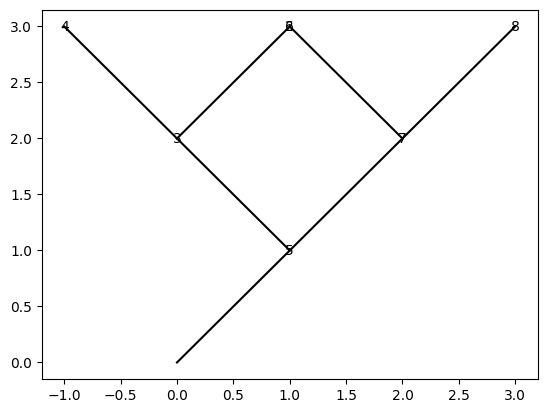

In [79]:
import matplotlib.pyplot as plt

def visualisasikan_pohon(node, x, y, dx, dy):
    if node is not None:
        plt.plot([x, x + dx], [y, y + dy], 'k-')
        plt.text(x + dx, y + dy, str(node.nilai), ha='center', va='center')
        visualisasikan_pohon(node.kiri, x + dx, y + dy, -dx, dy)
        visualisasikan_pohon(node.kanan, x + dx, y + dy, dx, dy)

# Visualisasikan pohon
visualisasikan_pohon(pohon.akar, 0, 0, 1, 1)
plt.show()

**Contoh 4 Teori tree**

Implementasikan struktur data pohon dalam Python untuk merepresentasikan chart organisasi hierarkis. Chart organisasi harus memiliki sifat-sifat berikut:

Setiap node dalam pohon merepresentasikan karyawan,
Setiap node memiliki ID unik, nama, dan jabatan,
Setiap node dapat memiliki anak (bawahan) yang banyak,
Pohon harus dapat melakukan traversal dan mencetak hirarki karyawan.

In [99]:
class Node:
    def __init__(self, id, name, title):
        self.id = id
        self.name = name
        self.title = title
        self.children = []

    def add_child(self, node):
        self.children.append(node)

    def traverse(self, indent=0):
        print('  ' * indent + f'ID: {self.id}, Name: {self.name}, Title: {self.title}')
        for child in self.children:
            child.traverse(indent + 1)

# Create nodes
ceo = Node(1, 'John ', 'CEO')
cto = Node(2, 'Jane ', 'CTO')
dev1 = Node(3, 'Alice ', 'Developer')
dev2 = Node(4, 'Agus', 'Developer')
dev3 = Node(5, 'Davis', 'Developer')

# Create tree structure
ceo.add_child(cto)
cto.add_child(dev1)
cto.add_child(dev2)
cto.add_child(dev3)

# Traverse and print tree
ceo.traverse()

ID: 1, Name: John , Title: CEO
  ID: 2, Name: Jane , Title: CTO
    ID: 3, Name: Alice , Title: Developer
    ID: 4, Name: Agus, Title: Developer
    ID: 5, Name: Davis, Title: Developer


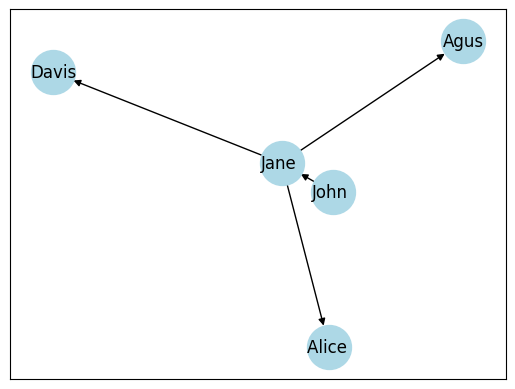

In [101]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
G.add_node(ceo.id, label=ceo.name)
G.add_node(cto.id, label=cto.name)
G.add_node(dev1.id, label=dev1.name)
G.add_node(dev2.id, label=dev2.name)
G.add_node(dev3.id, label=dev3.name)

G.add_edge(ceo.id, cto.id)
G.add_edge(cto.id, dev1.id)
G.add_edge(cto.id, dev2.id)
G.add_edge(cto.id, dev3.id)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=False, node_color='lightblue', node_size=1000)
labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels=labels)
plt.show()

**Contoh 5 Bahasa automata**


 Diberikan DFA yang menerima bahasa yang terdiri dari string yang mengandung jumlah karakter 'a' genap. DFA tersebut memiliki 2 state: q0 (state awal dan state akhir) dan q1 (state bukan akhir).

Transisi:

Dari q0 dengan input 'a' akan menuju ke q1,
Dari q0 dengan input 'b' akan tetap di q0,
Dari q1 dengan input 'a' akan menuju ke q0,
Dari q1 dengan input 'b' akan tetap di q1.

Tentukan apakah string yang diberikan diterima oleh DFA atau tidak

In [63]:
def dfa_accepts_string(s):
    state = 'q0'
    for char in s:
        if state == 'q0':
            if char == 'a':
                state = 'q1'
            elif char == 'b':
                state = 'q0'
        elif state == 'q1':
            if char == 'a':
                state = 'q0'
            elif char == 'b':
                state = 'q1'
    return state == 'q0'

# Contoh penggunaan
string = "aab"
hasil = dfa_accepts_string(string)
hasil


True

**Contoh 6 bahsaa automata**

Diberikan sebuah NFA yang menerima bahasa yang terdiri dari string yang mengandung sub-string 'ab'. NFA memiliki 3 state: q0 (state awal), q1 (state antara), dan q2 (state akhir).

Transisi:

Dari q0 dengan input 'a' akan menuju ke q1,
Dari q0 dengan input selain 'a' akan tetap di q0,
Dari q1 dengan input 'b' akan menuju ke q2,
Dari q1 dengan input selain 'b' akan kembali ke q0,
Dari q2 dengan input apapun akan tetap di q2.

Tentukan apakah string yang diberikan diterima oleh NFA atau tidak.

In [64]:
def nfa_accepts_string(s):
    current_states = {'q0'}
    for char in s:
        next_states = set()
        for state in current_states:
            if state == 'q0':
                if char == 'a':
                    next_states.add('q1')
                next_states.add('q0')
            elif state == 'q1':
                if char == 'b':
                    next_states.add('q2')
                else:
                    next_states.add('q0')
            elif state == 'q2':
                next_states.add('q2')
        current_states = next_states
    return 'q2' in current_states

# Contoh penggunaan
string = "aab"
hasil = nfa_accepts_string(string)
hasil


True